## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat


## Read the CSV file

In [5]:
poll = pd.read_csv("D:\Downloads\dataset\pollution_us_2000_2016.csv")

## Information about the sheet

In [6]:
poll.info


<bound method DataFrame.info of          Unnamed: 0  State Code  County Code  Site Num  \
0                 0           4           13      3002   
1                 1           4           13      3002   
2                 2           4           13      3002   
3                 3           4           13      3002   
4                 4           4           13      3002   
...             ...         ...          ...       ...   
1746656       24599          56           21       100   
1746657       24600          56           21       100   
1746658       24601          56           21       100   
1746659       24602          56           21       100   
1746660       24603          56           21       100   

                                         Address    State    County  \
0        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
1        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
2        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona 

## To obtain data types of the columns

In [8]:
poll.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

## identifying all the null values from the attributes

In [9]:
poll.isna().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

## count of the records in the columns

In [10]:
poll.count()

Unnamed: 0           1746661
State Code           1746661
County Code          1746661
Site Num             1746661
Address              1746661
State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Units            1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Units             1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Units            1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI               873754
CO Units             1746661
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI                873338
dtype: int64

## Removing all the unnecessary columns

In [11]:
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
poll.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


Some entries have several values for the same observation date. As there's no specific explanation for these duplications nor answers to questions to the forum, I'll get the mean values for each date and location (state in the case below).

In [12]:
## Prepare all 4 AQIs against state and date 
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

In [13]:
pollSt.info


<bound method DataFrame.info of                     NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0
...                     ...     ...      ...     ...
Wyoming 2016-03-27     22.0    46.0      0.0     1.0
        2016-03-28     21.0    48.0      0.0     1.0
        2016-03-29      3.0    37.0      0.0     1.0
        2016-03-30      1.0    44.0      0.0     1.0
        2016-03-31      1.0    44.0      0.0     1.0

[144721 rows x 4 columns]>

## Renaming the columns names


In [16]:
pollSt = pollSt.rename(columns={'NO2 AQI': 'NO2_AQI', 'O3 AQI': 'O3_AQI', 'SO2 AQI': 'SO2_AQI', 'CO AQI': 'CO_AQI' })
pollSt.head(5)

NO2_AQI  O3_AQI  SO2_AQI  CO_AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0

## Creating a correlation matrix

In [17]:
pollSt.corr()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.025708,0.397214,0.598608
O3_AQI,0.025708,1.000000,0.024482,-0.126909
SO2_AQI,0.397214,0.024482,1.000000,0.335044
CO_AQI,0.598608,-0.126909,0.335044,1.000000


## creating a heatmap for correlation

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.025708,0.397214,0.598608
O3_AQI,0.025708,1.000000,0.024482,-0.126909
SO2_AQI,0.397214,0.024482,1.000000,0.335044
CO_AQI,0.598608,-0.126909,0.335044,1.000000


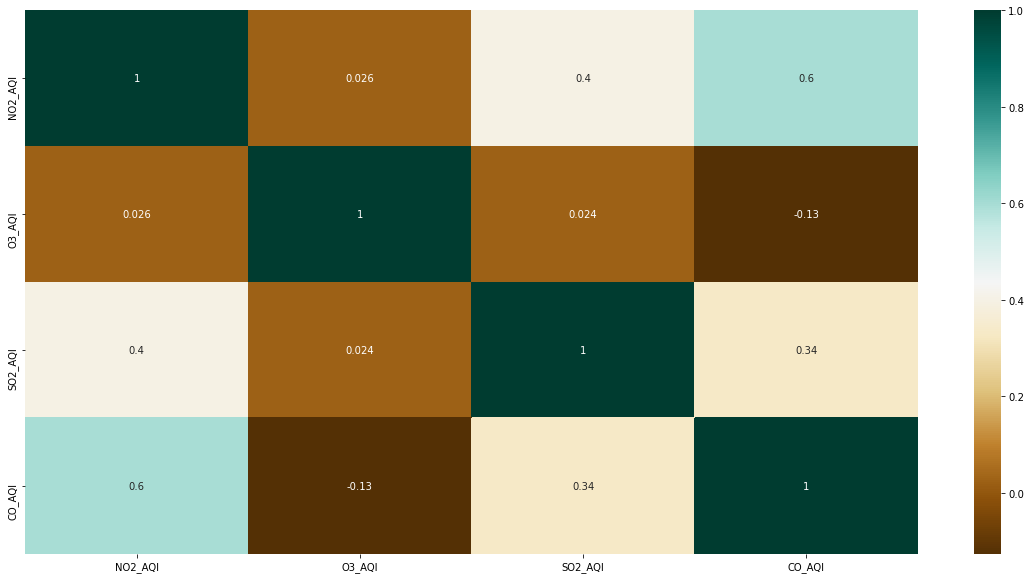

In [18]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= pollSt.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

## Scatterplots

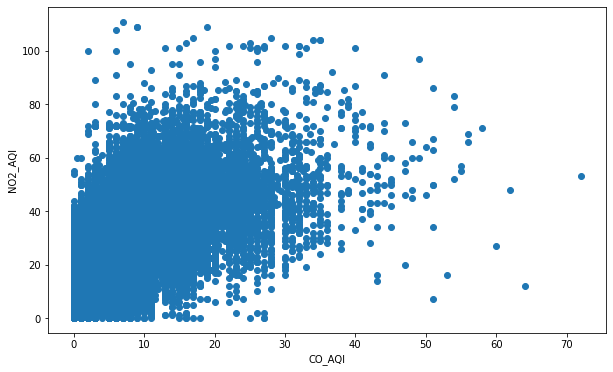

In [19]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(pollSt['CO_AQI'], pollSt['NO2_AQI'])
ax.set_xlabel('CO_AQI')
ax.set_ylabel('NO2_AQI')
plt.show()